## Task 1 : Retrieving and Preparing the Data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Loading the data here
heart_failure_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
# Checking the data types of the columns.
heart_failure_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [39]:
# Getting the decimal ages and converting to integer data type.
heart_failure_data.loc[heart_failure_data['age'] % 1 != 0, 'age'] = round(heart_failure_data.loc[heart_failure_data['age'] % 1 != 0, 'age'])
heart_failure_data['age'] = heart_failure_data['age'].astype(int)

In [40]:
# Ensuring there are no missing values and only two values for all categorical columns.
heart_failure_data.agg(['nunique', 'count']).transpose()

,nunique,count
age,46,299
anaemia,2,299
creatinine_phosphokinase,208,299
diabetes,2,299
ejection_fraction,17,299
high_blood_pressure,2,299
platelets,176,299
serum_creatinine,40,299
serum_sodium,27,299
sex,2,299


In [41]:
# Checking the max and min values of the columns.
heart_failure_data.describe().transpose()[['min','max']]

,min,max
age,40.0,95.0
anaemia,0.0,1.0
creatinine_phosphokinase,23.0,7861.0
diabetes,0.0,1.0
ejection_fraction,14.0,80.0
high_blood_pressure,0.0,1.0
platelets,25100.0,850000.0
serum_creatinine,0.5,9.4
serum_sodium,113.0,148.0
sex,0.0,1.0


In [42]:
# Converting the platelets units to kiloplatelets/mL to as the numerical values are huge.
heart_failure_data['platelets'] = heart_failure_data['platelets'].apply(lambda x : x/1000)

#### There should not be any outliers here. All the values are falling within the limits and the observations are not having any data entry/data processing errors.

## Task 2 : Data Exploration

### Task 2.1 : Feature Exploration

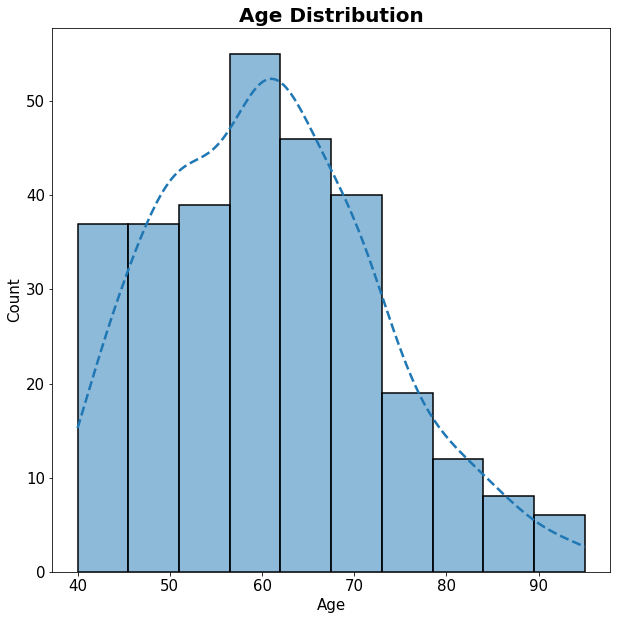

In [43]:
# Age distribution
plt.figure(figsize=(10,10))
sns.histplot(x = 'age', data = heart_failure_data, kde=True, lw= 1.5,line_kws=dict(lw=2.5, ls = '--'));
plt.title('Age Distribution', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
# We can see that age distribution is kind of normal distribution(from the density plot). From the sample, we can say that age
# group 55-70 is the major group in the data set.

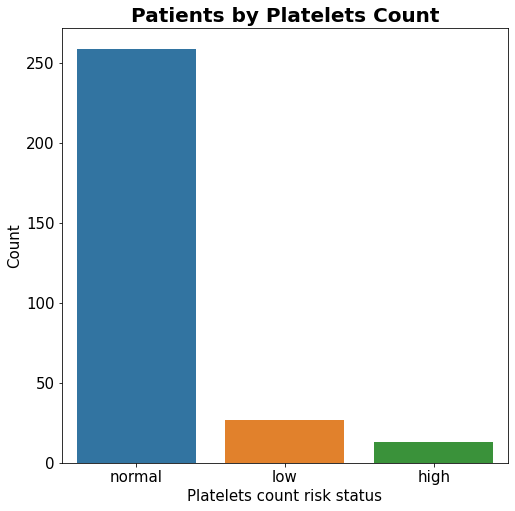

In [44]:
def platelets_count_categoriztaion(x):
    if x < 150:
        return 'low'
    elif 150 <= x <= 450:
        return 'normal'
    else:
        return 'high'
heart_failure_data['platelets_count_status'] = heart_failure_data['platelets'].apply(platelets_count_categoriztaion)
plt.figure(figsize = (8,8))
sns.countplot(x = 'platelets_count_status', data = heart_failure_data)
plt.title('Patients by Platelets Count',fontsize = 20, fontweight = 'bold')
plt.xlabel('Platelets count risk status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
# It is clear from the plots that majority of the sample patients (80% above) in the group are having normal platelets count.
# Number of patients with low platelet counts is almost double the patients with high platelet count. And giving us an
# indication that platelet count may not be a variable of interest for the analysis.

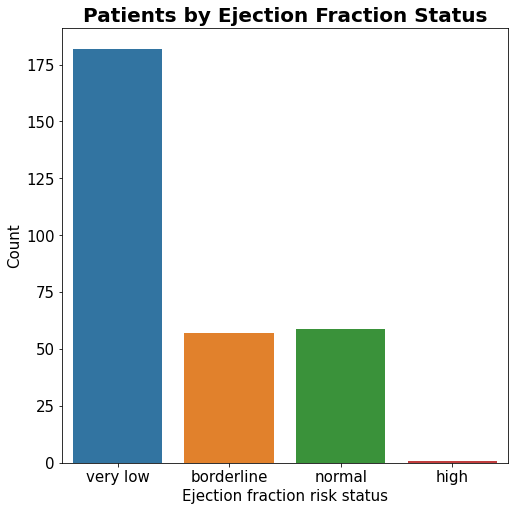

In [45]:
def ejection_fraction_categorize(x):
    if x < 40:
        return 'very low'
    elif 40 <= x <= 49:
        return 'borderline'
    elif 50 <= x <= 70:
        return 'normal'
    else:
        return 'high'
heart_failure_data['ejection_fraction_category'] = heart_failure_data['ejection_fraction'].apply(ejection_fraction_categorize)
plt.figure(figsize = (8,8))
sns.countplot(x = 'ejection_fraction_category', data = heart_failure_data)
plt.title('Patients by Ejection Fraction Status',fontsize = 20, fontweight = 'bold')
plt.xlabel('Ejection fraction risk status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
# The visualisation is saying that around 60% of the patients are having very low values for ejection fraction and leads us to
# the fact that ejection fraction has a huge impact on heart failure patients as this data set consists of heart failure 
# patients only. People with normal and borderline values are almost equal in the data set.

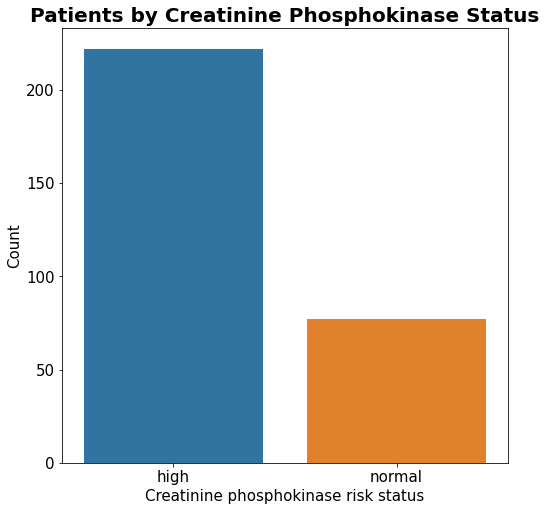

In [46]:
def creatinine_phospho_categorize(x):
    if x < 10:
        return 'low'
    elif 10 <= x <= 120:
        return 'normal'
    else:
        return 'high'
heart_failure_data['creatinine_phospho_category'] = heart_failure_data['creatinine_phosphokinase'].apply(creatinine_phospho_categorize)
plt.figure(figsize = (8,8))
sns.countplot(x = 'creatinine_phospho_category', data = heart_failure_data)
plt.title('Patients by Creatinine Phosphokinase Status',fontsize = 20, fontweight = 'bold')
plt.xlabel('Creatinine phosphokinase risk status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
# From the visualisation we can see that about 70% of the heart failure patients are having high values for creatinine
# phosphokinase and hence we can say heart failures might have influences from this clinical factor also. 

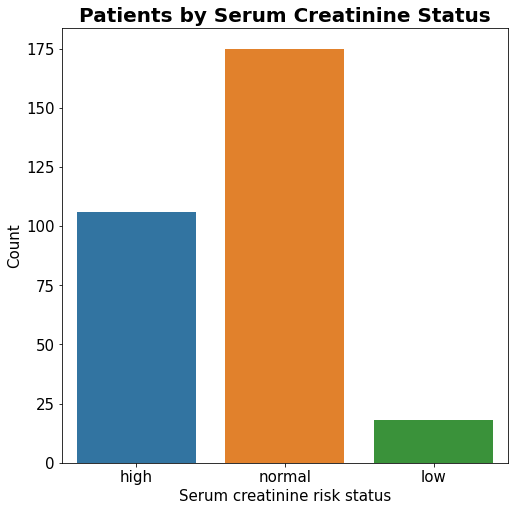

In [47]:
def serum_creatinine_categorize(x):
    if x[1]:
        if x[0] < 0.74:
            return 'low'
        elif 0.74 <= x[0] <= 1.35:
            return 'normal'
        else:
            return 'high'
    else:
        if x[0] < 0.59:
            return 'low'
        elif 0.59 <= x[0] <= 1.04:
            return 'normal'
        else:
            return 'high'

heart_failure_data['serum_creatinine_category'] = heart_failure_data[['serum_creatinine', 'sex']].apply(serum_creatinine_categorize, axis = 1)
plt.figure(figsize = (8,8))
sns.countplot(x = 'serum_creatinine_category', data = heart_failure_data)
plt.title('Patients by Serum Creatinine Status',fontsize = 20, fontweight = 'bold')
plt.xlabel('Serum creatinine risk status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
# From the visualisation graph its about 35% is having high levels of serum creatinine and 58% are having normal levels. Very few
#  are having low levels if serum creatinine. High levels of serum creatinine is also a primary reason for heart failures.

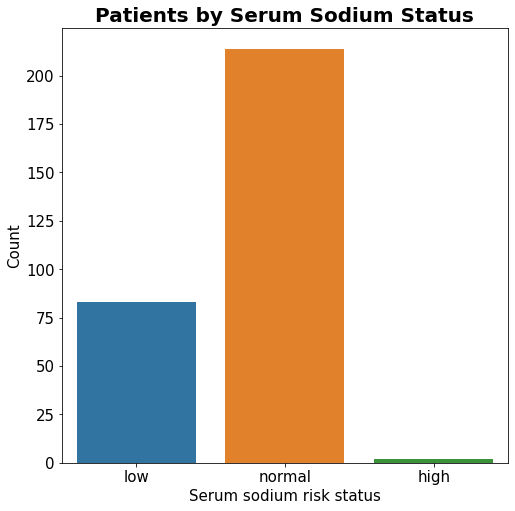

In [48]:
def serum_sodium_categorize(x):
    if x < 135:
        return 'low'
    elif 135 <= x <= 145:
        return 'normal'
    else:
        return 'high'

heart_failure_data['serum_sodium_category'] = heart_failure_data['serum_sodium'].apply(serum_sodium_categorize)
plt.figure(figsize = (8,8))
sns.countplot(x = 'serum_sodium_category', data = heart_failure_data)
plt.title('Patients by Serum Sodium Status',fontsize = 20, fontweight = 'bold')
plt.xlabel('Serum sodium risk status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
# As per the paper, low levels of sodium is caused by heart failures. About 26% of the patients are having low levls of sodium
# More than 70% of the people in the dataset have normal lavels of sodium. Persons with high levels of sodium are negligible. 

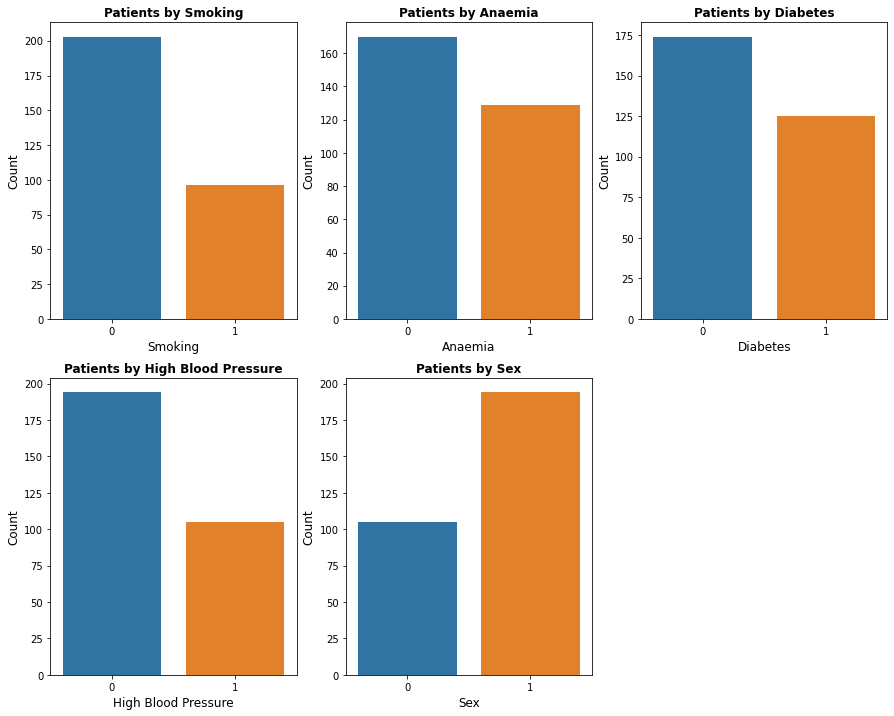

In [49]:
# Categorical count plots
fig, axes = plt.subplots(2,3, figsize=(15,12))
sns.countplot(x = 'smoking', data = heart_failure_data, ax=axes[0,0])
axes[0,0].set_title('Patients by Smoking', fontweight = 'bold')
axes[0,0].set_xlabel('Smoking', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
sns.countplot(x = 'anaemia', data = heart_failure_data, ax=axes[0,1])
axes[0,1].set_title('Patients by Anaemia', fontweight = 'bold')
axes[0,1].set_xlabel('Anaemia', fontsize=12)
axes[0,1].set_ylabel('Count', fontsize=12)
sns.countplot(x = 'diabetes', data = heart_failure_data, ax=axes[0,2])
axes[0,2].set_title('Patients by Diabetes', fontweight = 'bold')
axes[0,2].set_xlabel('Diabetes', fontsize=12)
axes[0,2].set_ylabel('Count', fontsize=12)
sns.countplot(x = 'high_blood_pressure', data = heart_failure_data, ax=axes[1,0])
axes[1,0].set_title('Patients by High Blood Pressure', fontweight = 'bold')
axes[1,0].set_xlabel('High Blood Pressure', fontsize=12)
axes[1,0].set_ylabel('Count', fontsize=12)
sns.countplot(x = 'sex', data = heart_failure_data, ax=axes[1,1])
axes[1,1].set_title('Patients by Sex', fontweight = 'bold')
axes[1,1].set_xlabel('Sex', fontsize=12)
axes[1,1].set_ylabel('Count', fontsize=12)
axes[1,2].set_visible(False)
# From these visualistaions we can infer the the following.
# 1. About majority are non-smokers, no anaemia, no high bp, no diabetes
# 2. Majority are men in the data sample

### Task 2.2 : Relationship between features

In [50]:
heart_failure_data.loc[heart_failure_data['DEATH_EVENT'] == 1][['anaemia','diabetes','high_blood_pressure','smoking', 'sex']].value_counts().to_frame('counts')
# This is a table showing categorization of persons died under various categorical features. 10 people who are dead due to heart
# failure are not suffering from diabetes, high bp or smoker. All in this category are men and have anaemia. At the same time if 
# we see the second row, we find 8 people dead are not having any of anaemia, diabetes, high bp or smoker. These statistics are
# not leading us anywhere regarding the connection between these variables and deaths. Reading the observations in 3rd and 4th
# rows (almost complementary to each other), which is the third highest in terms of deaths, telling us these categorical variables
# are either not having any influence in deaths due to heart failure or importance of these variables in determining death by 
# heart failures are less.

counts
anaemia diabetes high_blood_pressure smoking sex        
1       0        0                   0       1        10
0       0        0                   0       1         8
1       1        1                   0       0         6
0       0        0                   1       1         6
1       1        0                   0       0         6
0       0        0                   0       0         5
1       0        1                   1       1         5
0       1        1                   1       1         4
                 0                   1       1         4
1       0        1                   0       0         4
0       0        1                   0       1         4
        1        0                   0       1         4
1       1        0                   0       1         3
0       0        1                   1       1         3
        1        0                   0       0         3
                 1                   0       0         3
1       0        1                   0       1         3
0       1        1                   0       1         3
1       0        0                   1       1         3
        1        0                   1       1         2
        0        0                   0       0         2
0       0        1                   0       0         2
        1        1                   1       0         1
1       1        0                   1       0         1
        0        1                   1       0         1

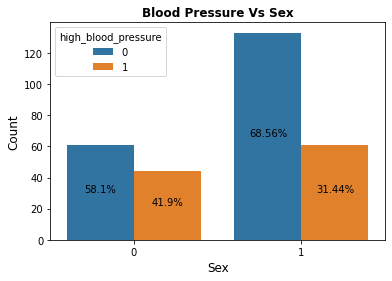

In [51]:
def add_percentage(plot):
    j = [2,3,0,1]
    for i in range(len(plot.patches)):
        plot.text(plot.patches[i].get_x() + plot.patches[i].get_width()/2, plot.patches[i].get_height()/2,
            f'{round(plot.patches[i].get_height()/(plot.patches[i].get_height() + plot.patches[j[i]].get_height())*100,2)}%',
                ha='center')

sex_bp = sns.countplot(x = 'sex', data = heart_failure_data, hue = 'high_blood_pressure')
add_percentage(sex_bp)
plt.title('Blood Pressure Vs Sex', fontweight='bold')
plt.xlabel('Sex', fontsize=12);
plt.ylabel('Count', fontsize=12);

# Among the heart failure patients, it is seen that about 2/3rd of the males are not having high BP where as in case of females
# between high BP and no high BP is not having a comparable diff with males

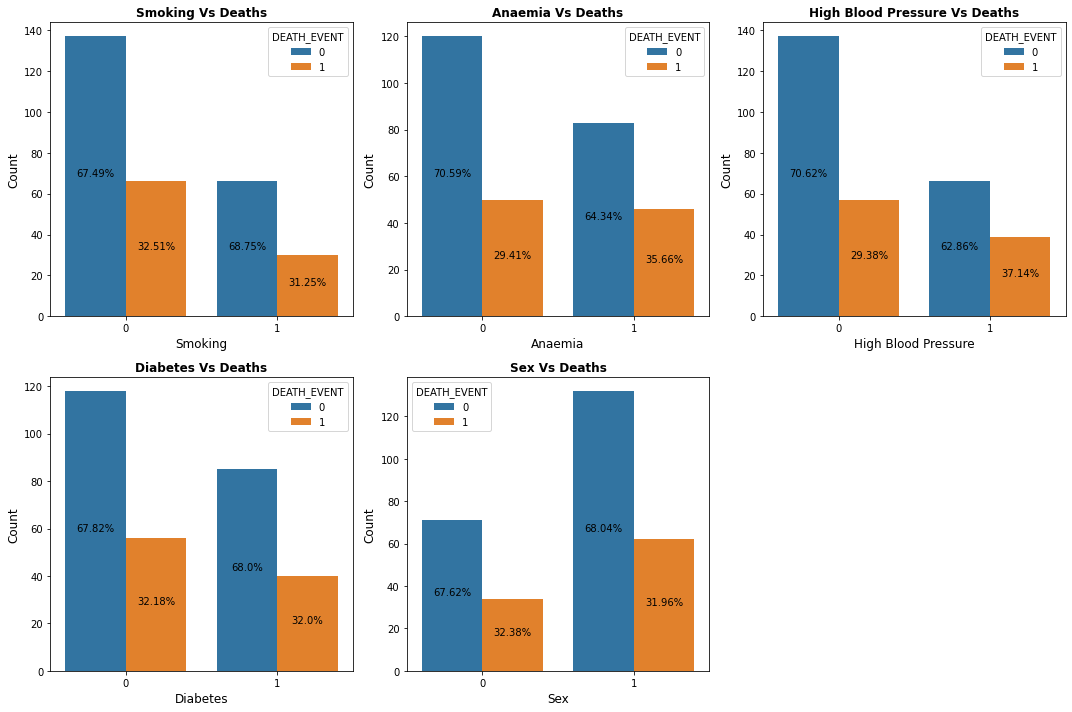

In [52]:
# Relationship between various features w.r.t Death Event
fig, axes = plt.subplots(2,3, figsize=(15,10))
smoke_de = sns.countplot(x = 'smoking', data = heart_failure_data, hue = 'DEATH_EVENT', ax=axes[0,0])
axes[0,0].set_title('Smoking Vs Deaths', fontweight='bold')
add_percentage(smoke_de)
axes[0,0].set_xlabel('Smoking', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
anaemia_de = sns.countplot(x = 'anaemia', data = heart_failure_data, hue = 'DEATH_EVENT', ax=axes[0,1])
axes[0,1].set_title('Anaemia Vs Deaths', fontweight='bold')
axes[0,1].set_xlabel('Anaemia', fontsize=12)
axes[0,1].set_ylabel('Count', fontsize=12)
add_percentage(anaemia_de)
bp_de = sns.countplot(x = 'high_blood_pressure', data = heart_failure_data, hue = 'DEATH_EVENT', ax=axes[0,2])
axes[0,2].set_title('High Blood Pressure Vs Deaths', fontweight='bold')
axes[0,2].set_xlabel('High Blood Pressure', fontsize=12)
axes[0,2].set_ylabel('Count', fontsize=12)
add_percentage(bp_de)
db_de = sns.countplot(x = 'diabetes', data = heart_failure_data, hue = 'DEATH_EVENT', ax=axes[1,0])
axes[1,0].set_title('Diabetes Vs Deaths', fontweight='bold')
axes[1,0].set_xlabel('Diabetes', fontsize=12)
axes[1,0].set_ylabel('Count', fontsize=12)
add_percentage(db_de)
sex_de = sns.countplot(x = 'sex', data = heart_failure_data, hue = 'DEATH_EVENT', ax=axes[1,1])
axes[1,1].set_title('Sex Vs Deaths', fontweight='bold')
axes[1,1].set_xlabel('Sex', fontsize=12)
axes[1,1].set_ylabel('Count', fontsize=12)
add_percentage(sex_de)
axes[1,2].set_visible(False)
plt.tight_layout()

# From the plots it is clear that for the sample of heart failure patients available, death event is not showing any
# relationship bw categorical variables. The percentage split is almost the same for the positive and negative case. For 
# example, among non-smokers survival rate is more than double the deaths and for smokers also the same and all the other
# categorical variables also follows the same.

Text(0.5, 0.98, 'Distibution of Death Event by EF and SC')

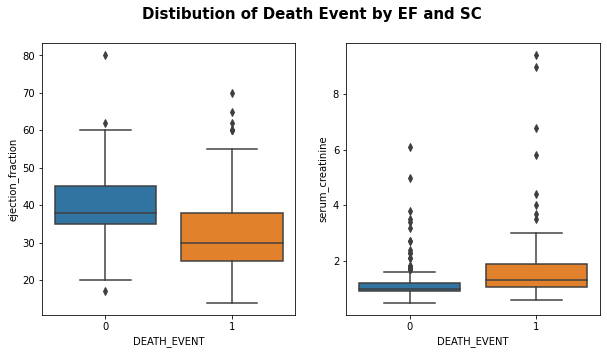

In [53]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x = 'DEATH_EVENT', y = 'ejection_fraction', data = heart_failure_data, ax= axes[0])
sns.boxplot(x = 'DEATH_EVENT', y = 'serum_creatinine', data = heart_failure_data, ax= axes[1])

plt.suptitle('Distibution of Death Event by EF and SC', fontweight='bold', fontsize=15)
# The plots below says that death events happen more with people having less ejection fraction and higher levels of the
# serum creatinine

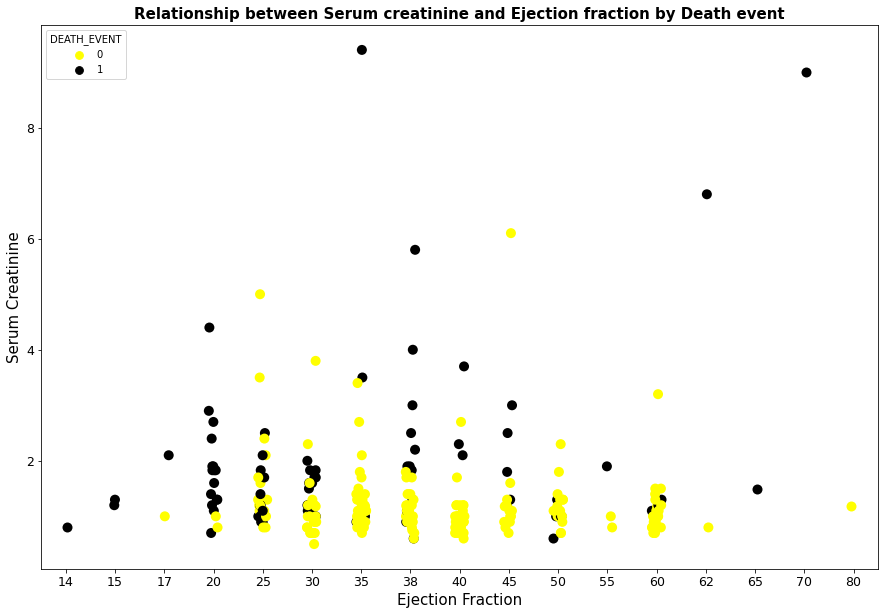

In [54]:
# Relationship between ejection_fraction, serum_creatinine and death event
plt.figure(figsize=(15,10))
sns.stripplot(x = 'ejection_fraction', y = 'serum_creatinine', data = heart_failure_data, hue = 'DEATH_EVENT', color = 'yellow', size = 10, palette=['yellow','black'])
plt.title('Relationship between Serum creatinine and Ejection fraction by Death event', fontweight='bold', fontsize=15)
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.xlabel('Ejection Fraction', fontsize = 15)
plt.ylabel('Serum Creatinine', fontsize = 15);
# Deaths caused by heart failures are highly influenced by ejection fraction and serum creatinine. From the visualisation, we 
# can see that, deaths are more concentrated when ejection fraction is lesser than 35 and serum creatinine less than 4. But, 
# usually higher values of serum creatinine drives to death and ther conclusion from here is, when serum creatinine is lower,
# deaths by heart failures is more affected by lower values of ejection fraction. When we move towards right side of the 
# graph we can see the black dots (deaths) are going to higher values and this indicates when the ejection fractions are high
# the death event is mainly caused by higher serum creatinine. The probablity of death is most for persons with high serum
# creatinine and low ejection fractions. There are some outliers from the graph but majority of the data points follows the 
# same.

Text(0.5, 1.0, 'Distribution of Age by Death Event')

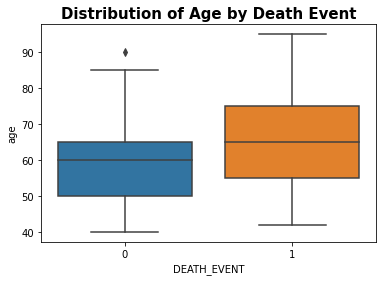

In [55]:
# Relationship between death and age
sns.boxplot(x = 'DEATH_EVENT', y = 'age', data = heart_failure_data)
plt.title('Distribution of Age by Death Event', fontweight='bold', fontsize=15)
# From the visualisation, we can infer that deaths mostly happened with people with higher ages and that is expected. For a
# given set of clinical conditions we can say that a person with lower age has higher chance of survival, which we usually 
# think as obvious and the graphs also illustrates the same.

Text(0.5, 1.0, 'Categorisation of Creatinine Phosphokinase by Sex')

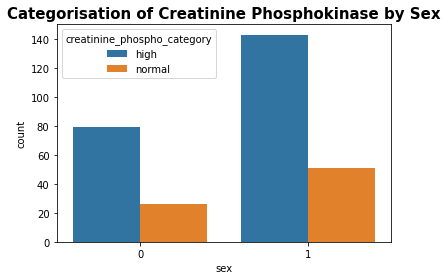

In [56]:
sns.countplot(x = 'sex', data = heart_failure_data, hue = 'creatinine_phospho_category')
plt.title('Categorisation of Creatinine Phosphokinase by Sex', fontweight='bold', fontsize=15)
# The visualisation graph is saying that there are no relationships between creatinine phosphokinase and sex because in both 
# men and women the ratio of normal/high creatinine phosphokinase are almost the same

<AxesSubplot:title={'center':'Serum Creatinine vs Anaemia by Platelets count'}, xlabel='anaemia', ylabel='serum_creatinine'>

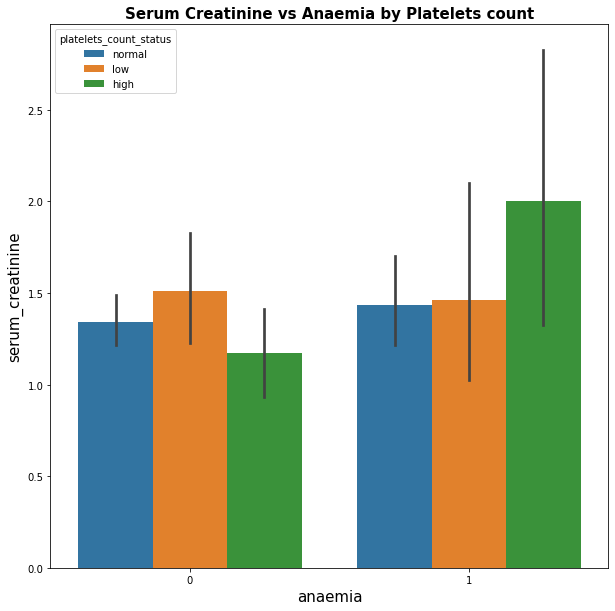

In [57]:
plt.figure(figsize=(10,10))
plt.title('Serum Creatinine vs Anaemia by Platelets count',fontweight='bold', fontsize=15)
plt.xlabel('Anaemia', fontsize = 15)
plt.ylabel('Anaemia', fontsize = 15)
sns.barplot(x = 'anaemia', y = 'serum_creatinine', data = heart_failure_data, hue = 'platelets_count_status')
# From the visualisation we can see that, among the persons with no anaemia, frequency of persons with high platelet count is 
# the lowest whereas for persons with anaemia it is the highest. And on seeing the uncertainty line (black line) with confidence
# interval of 95 we can say for persons with anaemia the variability(distribution) of serum creatinine is more when compared 
# with persons with no anemia. 

Text(0.5, 0.98, 'Distribution of Ejection Fraction')

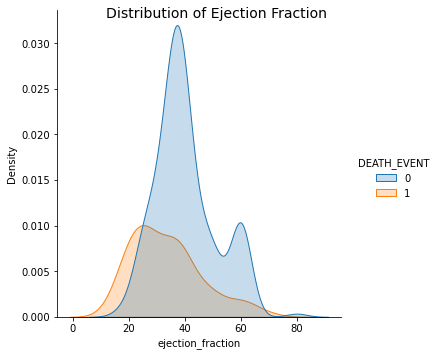

In [58]:
# Ejection Fraction distribution for Death Event
ax = sns.displot(data=heart_failure_data, x = 'ejection_fraction', kind='kde', hue='DEATH_EVENT', fill=True)
ax.fig.suptitle('Distribution of Ejection Fraction', fontsize=14, fontdict={"weight": "bold"})

# From the distribution curve we see that most of the patients have their ejection fraction
# either in very low or borderline region and there is more death reported for lower valueof ejection fraction
# (below 40). Hence, the given data points that ejection fraction is an important feature for determining whether
# the person lives or dies.

Text(0.5, 0.98, 'Distribution of Creatinine Phosphokinase')

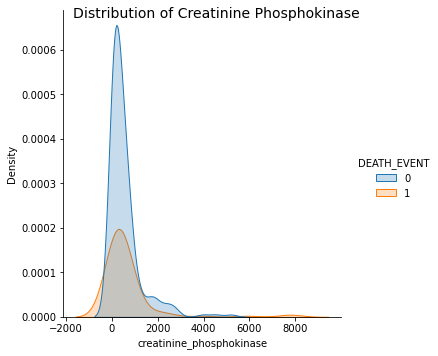

In [59]:
# Creatinine Phosphokinase distribution for Death Event
ax = sns.displot(data=heart_failure_data, x = 'creatinine_phosphokinase', kind='kde', hue='DEATH_EVENT', fill=True)
ax.fig.suptitle('Distribution of Creatinine Phosphokinase', fontsize=14, fontdict={"weight": "bold"})

# Looking at the distribution graph, we can see the peaks for death and survival happens almost for the same
# values of creatinine phosphokinase. This gives us no realationship between death event and creatinine 
# phosphokinase.

Text(0.5, 0.98, 'Distribution of Serum Creatinine')

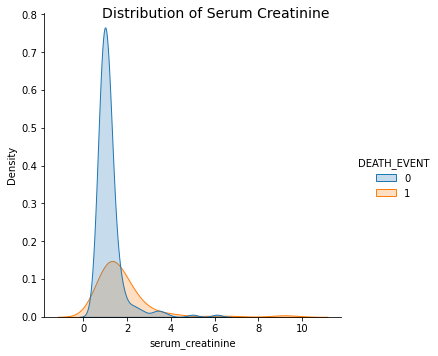

In [60]:
# Serum Creatinine distribution for Death Event
ax = sns.displot(data=heart_failure_data, x = 'serum_creatinine', kind='kde', hue='DEATH_EVENT', fill=True)
ax.fig.suptitle('Distribution of Serum Creatinine', fontsize=14, fontdict={"weight": "bold"})

# Death usually occurred at slightly higher range of serum creatinine.

Text(0.5, 0.98, 'Distribution of Serum Sodium')

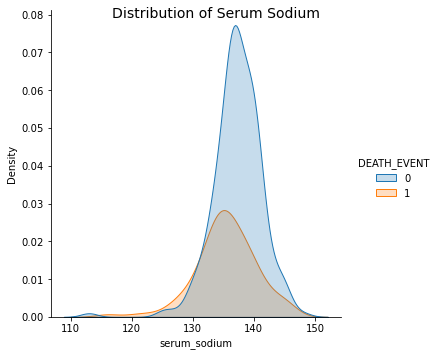

In [61]:
# Serum Sodium distribution for Death Event
ax = sns.displot(data=heart_failure_data, x = 'serum_sodium', kind='kde', hue='DEATH_EVENT', fill=True)
ax.fig.suptitle('Distribution of Serum Sodium', fontsize=14, fontdict={"weight": "bold"})

# Looking at the distribution graph, we can see the peaks for death is slightly to the left than that for survival.
# From this visualization we can say that for lower values of serum sodium there are more deaths.

## Data Modelling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations
from sklearn.utils import shuffle

In [63]:
# Clinical features considered for the modelling algorithm
col_list = ['anaemia','creatinine_phosphokinase','ejection_fraction','diabetes', 'high_blood_pressure','platelets',
           'serum_creatinine', 'serum_sodium']

In [64]:
# Steep Ascent Hill Climbing algorithm for Feature selection.
features_count_list = []
new_Ind = []
cur_MaxScore = 0.0
col_num = 8
col_Ind_Random = shuffle(range(0,col_num), random_state=3)
col_Ind_Random
for cur_f in range(0, col_num):
    high_score_pos = -1
    j = 0
    while True:
        newData = heart_failure_data[col_list].iloc[:, new_Ind + [col_Ind_Random[j]]].copy()
        X_train, X_test, y_train, y_test = train_test_split(newData, heart_failure_data['DEATH_EVENT'], test_size=0.2, random_state=0)
        clf = KNeighborsClassifier(3, weights='uniform', p=2)
        fit = clf.fit(X_train, y_train)
        cur_Score = clf.score(X_test, y_test)
        if cur_Score > cur_MaxScore:
            high_score_pos = j
            cur_MaxScore = cur_Score
            if not len(new_Ind):
                break
        j+=1
        if j >= len(col_Ind_Random):
            break
    if high_score_pos == -1:
        features_count_list.append(len(new_Ind))
        break
    new_Ind.append(col_Ind_Random[high_score_pos])
    col_Ind_Random.pop(high_score_pos)
    print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_MaxScore))

Score with 1 selected features: 0.4666666666666667
Score with 2 selected features: 0.6
Score with 3 selected features: 0.6666666666666666


In [65]:
# Combination of different columns
comb  = list(combinations(col_list,3))

In [66]:
# K-nearest neighbors classification algorithm with neighbors from 2-6 with different 3 feature combinations
high = 0
high_col = []
k_value = 0
for cols in comb:
    X_train, X_test, y_train, y_test =train_test_split(heart_failure_data[list(cols)],heart_failure_data['DEATH_EVENT'],test_size=0.20,random_state=4)
    for i in range(2,6):
        clf = KNeighborsClassifier(i, weights='uniform',p=2)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        score_clf = clf.score(X_test, y_test)
        if high < score_clf:
            high = score_clf
            high_col = [cols]
            k_value = i
        elif high == score_clf:
            high_col.append(cols)

print(high)
print(high_col)
print(k_value)

0.7833333333333333
[('ejection_fraction', 'high_blood_pressure', 'serum_creatinine')]
2


In [67]:
# The best column combination with KNN algorithm and classification report
X_train, X_test, y_train, y_test =train_test_split(heart_failure_data[['ejection_fraction','serum_creatinine','high_blood_pressure']],heart_failure_data['DEATH_EVENT'],test_size=0.20,random_state=4)
clf = KNeighborsClassifier(2, weights='uniform', p= 2)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
clf.score(X_test, y_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[37  5]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.67      0.56      0.61        18

    accuracy                           0.78        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.78      0.78      0.78        60



In [68]:
## Decision tree algorithm starting
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Steep Ascent hill climbing with decision tree
features_count_list = []
new_Ind = []
cur_MaxScore = 0.0
col_num = 8
col_Ind_Random = shuffle(range(0,col_num), random_state=3)
col_Ind_Random
for cur_f in range(0, col_num):
    high_score_pos = -1
    j = 0
    while True:
        newData = heart_failure_data[col_list].iloc[:, new_Ind + [col_Ind_Random[j]]].copy()
        X_train, X_test, y_train, y_test = train_test_split(newData, heart_failure_data['DEATH_EVENT'], test_size=0.2, random_state=0)
        clf = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_samples_split=6, min_samples_leaf=3,
                            max_depth=None, max_leaf_nodes=None)
        fit = clf.fit(X_train, y_train)
        cur_Score = clf.score(X_test, y_test)
        if cur_Score > cur_MaxScore:
            high_score_pos = j
            cur_MaxScore = cur_Score
            if not len(new_Ind):
                break
        j+=1
        if j >= len(col_Ind_Random):
            break
    if high_score_pos == -1:
        features_count_list.append(len(new_Ind))
        break
    new_Ind.append(col_Ind_Random[high_score_pos])
    col_Ind_Random.pop(high_score_pos)
    print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_MaxScore))

Score with 1 selected features: 0.5
Score with 2 selected features: 0.6166666666666667
Score with 3 selected features: 0.7333333333333333


In [70]:
# Combination of different columns
comb  = list(combinations(col_list,3))

In [71]:
# Application of decision tree algorithm with different combinations of columns to identify the best 3 features
high = 0
high_col = []
k_value = 0
for cols in comb:
    X_train, X_test, y_train, y_test =train_test_split(heart_failure_data[list(cols)],heart_failure_data['DEATH_EVENT'],test_size=0.20,random_state=4)

    clf = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_samples_split=6, min_samples_leaf=3,
                            max_depth=None, max_leaf_nodes=None)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    score_clf = clf.score(X_test, y_test)
    if high < score_clf:
        high = score_clf
        high_col = [cols]
    elif high == score_clf:
        high_col.append(cols)

print(high)
print(high_col)

0.75
[('anaemia', 'high_blood_pressure', 'serum_creatinine'), ('ejection_fraction', 'high_blood_pressure', 'serum_creatinine')]


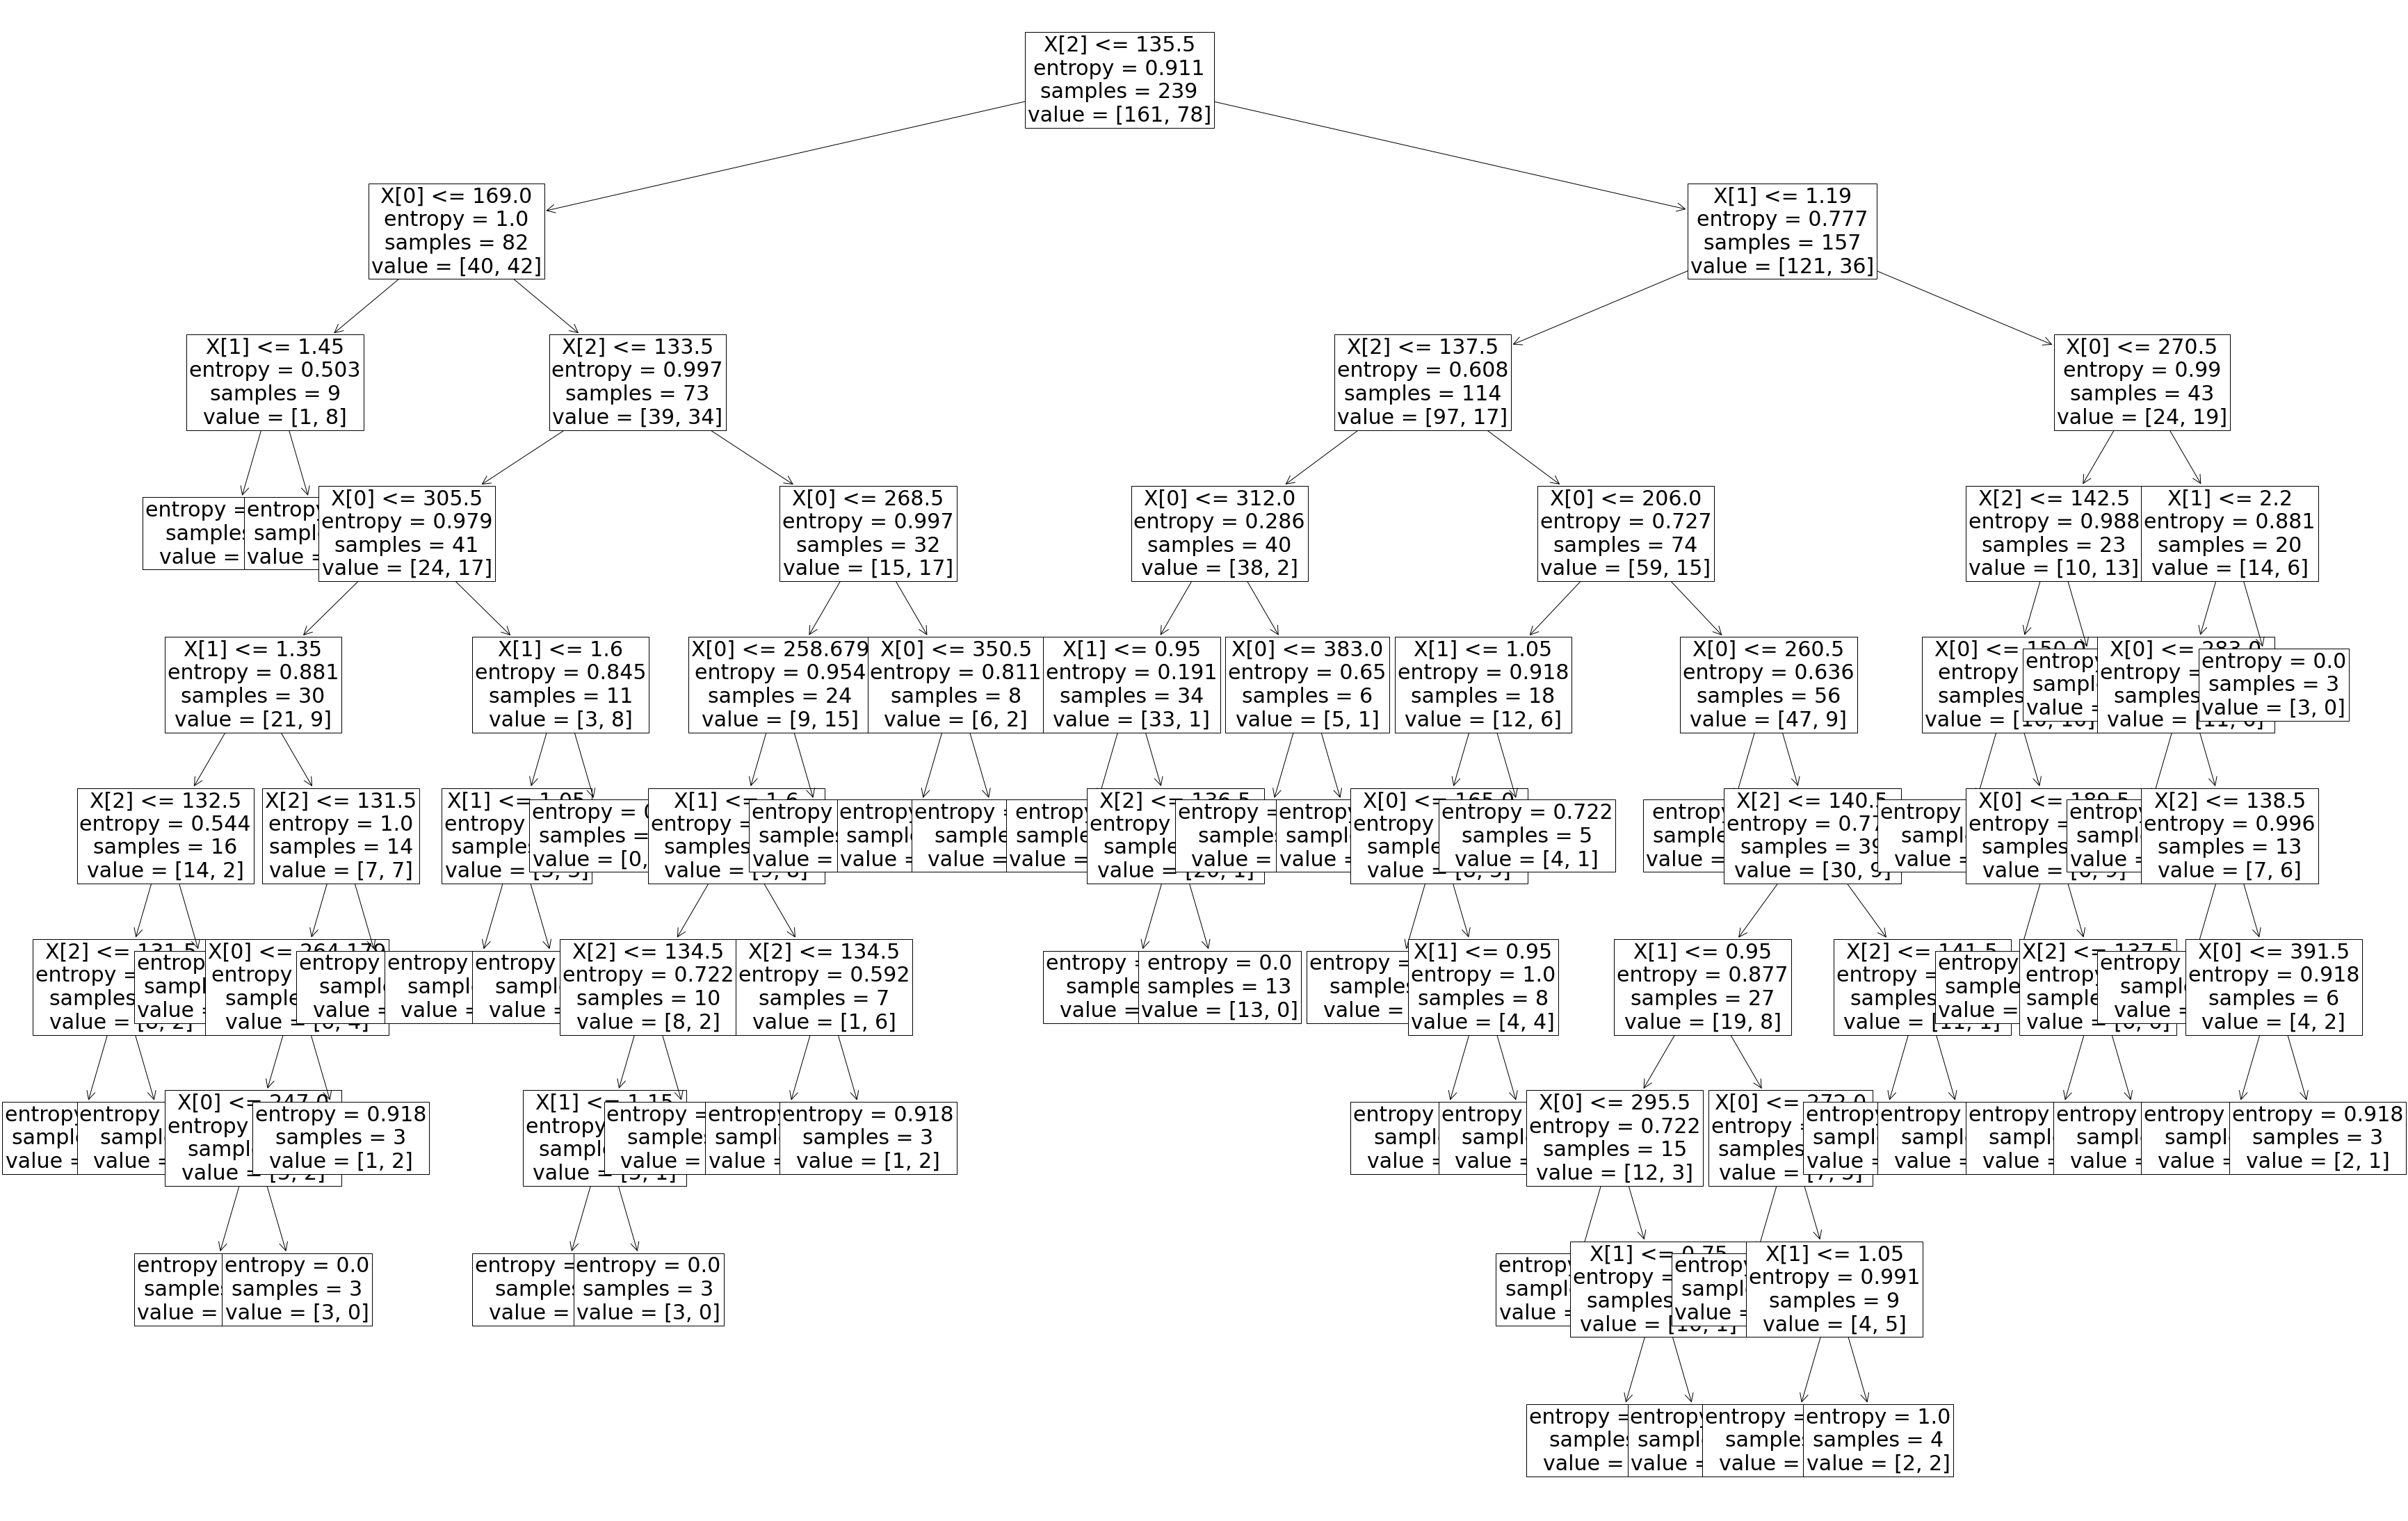

In [72]:
# Decision tree plot with the best selected features as per the algorithm

plt.figure(figsize=(60,40))
tree.plot_tree(clf, fontsize=30)
plt.show()

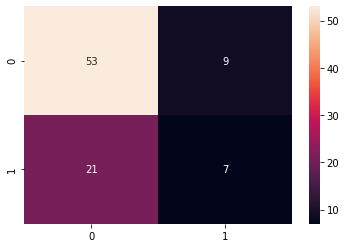

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        62
           1       0.44      0.25      0.32        28

    accuracy                           0.67        90
   macro avg       0.58      0.55      0.55        90
weighted avg       0.63      0.67      0.64        90

0.6666666666666666


In [73]:
# The best column combination with Decision tree algorithm and classification report

X_train, X_test, y_train, y_test = train_test_split(heart_failure_data[['ejection_fraction', 'diabetes', 'serum_creatinine']], heart_failure_data[['DEATH_EVENT']], test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_samples_split=6, min_samples_leaf=3,
                            max_depth=None, max_leaf_nodes=None)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_pre))
print(accuracy_score(y_test, y_pre))